# Credit Card Fraud Prediction

__Anonymized credit card transactions labeled as fraudulent or genuine.__

Source: https://www.kaggle.com/mlg-ulb/creditcardfraud/


## Connect to Azure ML Workspace

In [1]:
from azureml.core import Workspace, Dataset

ws = Workspace.from_config()

## Download dataset

Download dataset via:

- Kaggle API:

`
!kaggle datasets download -d mlg-ulb/creditcardfraud
!unzip 310_23498_bundle_archive.zip
!rm 310_23498_bundle_archive.zip
`

- AzureML Dataset:

In [2]:
dataset = Dataset.get_by_name(ws, name='credit-card-fraud')
fraud_df = dataset.to_pandas_dataframe()

fraud_df.sample(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
58146,48253.0,1.452502,-1.316583,0.880687,-1.288393,-1.650246,0.151818,-1.458603,-0.001593,-1.164131,...,-0.264667,-0.195252,-0.079343,-0.432323,0.389680,-0.150356,0.080246,0.032034,44.00,0
262509,160510.0,-0.264772,1.160995,-0.722729,-0.584521,0.536621,-0.556156,0.482343,0.520093,-0.378470,...,-0.237398,-0.747180,0.189148,0.579325,-0.479137,0.096986,0.088747,0.011643,12.28,0
283100,171375.0,2.027482,0.487514,-2.494798,0.593271,0.688871,-1.319071,0.226431,-0.210464,0.359924,...,0.121349,0.490287,-0.092391,-0.566630,0.250518,-0.098293,0.012016,-0.006847,1.00,0
83467,59861.0,-0.093152,1.519047,-0.420606,0.768906,0.591403,-0.685547,0.743522,0.120163,-0.879556,...,0.138558,0.577227,-0.058868,-0.408971,-0.522352,-0.365776,0.324569,0.163131,1.79,0
189782,128558.0,2.010146,-0.216784,-1.519050,0.761876,0.097977,-0.369543,-0.193014,-0.120119,1.577719,...,0.132073,0.866695,-0.231210,-0.731057,0.518091,0.114702,0.034422,-0.034394,22.09,0
42529,41138.0,-0.431674,0.036375,1.125577,-1.253363,0.379716,0.062079,0.721553,-0.047868,0.316913,...,0.331992,1.148207,-0.021971,-0.246534,-0.314678,-0.566201,0.041220,-0.066911,74.16,0
58388,48362.0,1.184174,-0.164214,0.002037,0.285464,0.445568,1.486639,-0.499985,0.500229,0.618100,...,-0.286540,-0.882160,0.304286,3.641635,0.249233,0.149621,-0.037624,0.046187,19.95,0
23316,32695.0,-0.788216,0.386165,0.400468,-1.771132,-0.083852,-1.044490,0.356663,-0.111545,-0.490689,...,0.134933,0.658197,-0.196148,-0.103694,-0.090172,-0.286746,0.603564,0.399416,20.00,0
179527,124119.0,1.914871,-1.955733,-1.260505,-1.806072,-0.495409,1.647478,-1.476351,0.597395,-1.286983,...,0.030947,0.424646,0.330808,-0.642742,-0.585631,-0.091532,0.044922,-0.057771,99.00,0
80109,58341.0,1.371899,0.506583,-0.687368,0.773842,0.776879,-0.376092,0.571154,-0.305173,-0.285927,...,-0.079967,-0.136659,-0.328316,-0.977163,1.061643,-0.212135,-0.005731,-0.001405,3.74,0


## EDA

In [3]:
fraud_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284806.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.841366,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.958151e-16,-3.147640e-15,...,1.471982e-16,8.042109e-16,5.282450e-16,4.458267e-15,1.426896e-15,1.701640e-15,-3.671606e-16,-1.218152e-16,88.349619,0.001727
std,47488.228330,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.250000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84691.500000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.750000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## Split dataset

In [4]:
from sklearn.model_selection import train_test_split

seed = 314

# X
train_df, test_df = train_test_split(fraud_df, test_size=0.2, random_state=seed)

# Y
label = 'Class'

## Automatically train a model

### Set training settings

View:

- the full list of [settings](https://docs.microsoft.com/en-us/python/api/azureml-train-automl-client/azureml.train.automl.automlconfig.automlconfig?view=azure-ml-py)
- [featurization](https://docs.microsoft.com/en-us/azure/machine-learning/how-to-configure-auto-features).


In [5]:
import logging

# Set settings
automl_settings = {
    "iteration_timeout_minutes": 15,
    "experiment_timeout_minutes": 360,
    "iterations": 20,
    "primary_metric": 'AUC_weighted',
    "featurization": 'auto',
    "verbosity": logging.INFO,
    "n_cross_validations": 8
}


# Config AutoML task
from azureml.train.automl import AutoMLConfig

automl_config = AutoMLConfig(task='classification',
                             training_data=train_df,
                             label_column_name=label,
                             debug_log='automl.log',
                             **automl_settings)
							 

### Run experiment on local machine

In [6]:
from azureml.core.experiment import Experiment

# Choose a name for the experiment and specify the project folder.
experiment_name = 'credit-card-fraud-automl'
experiment = Experiment(ws, experiment_name)

In [7]:
automl_run = experiment.submit(automl_config, show_output=True)

Running on local machine
Parent Run ID: AutoML_2a9ad310-7fa2-49df-a64b-64a4b17c0acf

Current status: DatasetEvaluation. Gathering dataset statistics.
Current status: FeaturesGeneration. Generating features for the dataset.
Current status: DatasetFeaturization. Beginning to fit featurizers and featurize the dataset.
Current status: DatasetFeaturizationCompleted. Completed fit featurizers and featurizing the dataset.
Current status: DatasetBalancing. Performing class balancing sweeping
Current status: DatasetCrossValidationSplit. Generating individually featurized CV splits.

****************************************************************************************************
DATA GUARDRAILS: 

TYPE:         Class balancing detection
STATUS:       ALERTED
DESCRIPTION:  To decrease model bias, please cancel the current run and fix balancing problem.
              Learn more about imbalanced data: https://aka.ms/AutomatedMLImbalancedData
DETAILS:      Imbalanced data can lead to a falsely p

In [8]:
from azureml.widgets import RunDetails
RunDetails(automl_run).show()

_AutoMLWidget(widget_settings={'childWidgetDisplay': 'popup', 'send_telemetry': False, 'log_level': 'INFO', 's…

## Explore result

In [9]:
best_run, fitted_model = automl_run.get_output()

print(best_run)
print(fitted_model)

Run(Experiment: credit-card-fraud-automl,
Id: AutoML_2a9ad310-7fa2-49df-a64b-64a4b17c0acf_18,
Type: None,
Status: Completed)
Pipeline(memory=None,
     steps=[('datatransformer', DataTransformer(enable_dnn=None, enable_feature_sweeping=None,
        feature_sweeping_config=None, feature_sweeping_timeout=None,
        featurization_config=None, force_text_dnn=None,
        is_cross_validation=None, is_onnx_compatible=None, logger=None,
        obser...666666666667, 0.06666666666666667, 0.06666666666666667, 0.06666666666666667, 0.06666666666666667]))])


## Score data

In [10]:
probs = fitted_model.predict_proba(test_df.drop(columns=label))
pred = probs[:, 1]

print(pred[:10])

[0.23329543 0.23335615 0.23328573 0.23342311 0.23329441 0.23312848
 0.23473714 0.23336757 0.23321898 0.23339139]


## Evaluate model

In [11]:
import numpy as np
from sklearn import metrics

fpr, tpr, threshold = metrics.roc_curve(test_df[label], pred)
roc_auc = metrics.auc(fpr, tpr)
roc_auc

0.9812154822899912

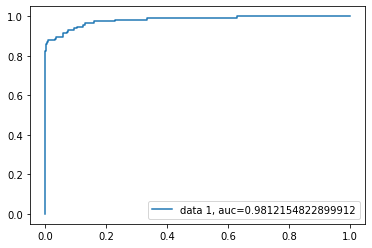

In [12]:
import matplotlib.pyplot as plt

auc = metrics.roc_auc_score(test_df[label], pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()